In [1]:
import io
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch
from pathlib import Path
%matplotlib inline

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

cluster_assignments = torch.load('output_clustersB.pt')

# run_id = 'SUB-928'
run_id = 'SUB-849'
path = Path('../data/models/checkpoints', run_id, 'embeddings.pkl')

# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_379-cifar100.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_379.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_819.pkl', 'rb'))
# feature_bank, feature_labels, embedding, targets, label_names = pickle.load(open('embeds_820.pkl', 'rb'))
feature_bank, feature_labels, embedding, targets, label_names = CPU_Unpickler(open(path, 'rb')).load()

ks = []
for i in range(5):
    subset = feature_labels[cluster_assignments == i]

    u, c = np.unique(subset, return_counts=True)
    print(len(u))
    cs = np.sort(c)[::-1]
    csc = np.cumsum(cs) / np.sum(cs)
    ks.append(csc)

88
83
91
94
90


In [22]:
# Assuming A_kl contains the cluster labels
unique_labels, counts = np.unique(cluster_assignments, return_counts=True)

# Print the number of samples per cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster 0: 14535 samples
Cluster 1: 7275 samples
Cluster 2: 7907 samples
Cluster 3: 12123 samples
Cluster 4: 8160 samples


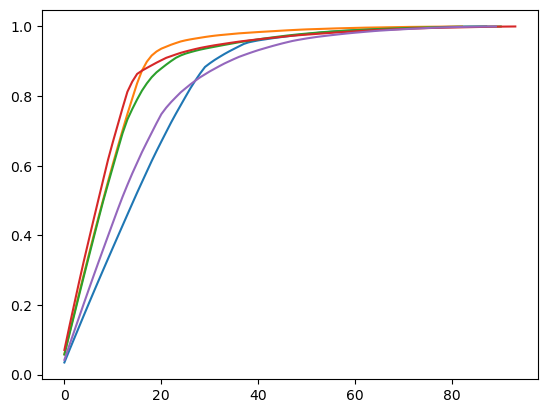

In [6]:
for i in range(5):
    plt.plot(ks[i])
# plt.plot(csc)

In [3]:
print(ks)

[array([0.03458678, 0.06889294, 0.1025677 , 0.13610215, 0.16963659,
       0.20275011, 0.23558299, 0.26827557, 0.30054721, 0.33260839,
       0.36452925, 0.39630981, 0.4280202 , 0.45966045, 0.49116038,
       0.52251999, 0.55289743, 0.58313456, 0.61330153, 0.64192507,
       0.66956644, 0.69685702, 0.72393714, 0.74947383, 0.77402834,
       0.7985127 , 0.82264627, 0.84453487, 0.8650905 , 0.88368177,
       0.89427529, 0.90388663, 0.91251579, 0.92086432, 0.92858145,
       0.93573734, 0.94282307, 0.94983864, 0.95446892, 0.95734531,
       0.96008138, 0.96218605, 0.96429073, 0.96632524, 0.96821945,
       0.9700435 , 0.97186755, 0.97362144, 0.97530518, 0.9768486 ,
       0.97832187, 0.97979515, 0.98119826, 0.98253122, 0.98365371,
       0.9847762 , 0.98582854, 0.98674056, 0.98765259, 0.9884243 ,
       0.98919602, 0.98996773, 0.99066929, 0.99137084, 0.9920724 ,
       0.99277396, 0.9933352 , 0.99389645, 0.99438754, 0.99487863,
       0.99536972, 0.99579066, 0.99621159, 0.99663252, 0.9970

In [7]:


#latex tikz plot format
for k in ks:
    ones = np.ones(100)
    ones[:len(k)] = k
    k = ones
    print(' '.join([f'({i+1},{j:.3f})' for i, j in enumerate(k)]))




(1,0.035) (2,0.069) (3,0.103) (4,0.136) (5,0.170) (6,0.203) (7,0.236) (8,0.268) (9,0.301) (10,0.333) (11,0.365) (12,0.396) (13,0.428) (14,0.460) (15,0.491) (16,0.523) (17,0.553) (18,0.583) (19,0.613) (20,0.642) (21,0.670) (22,0.697) (23,0.724) (24,0.749) (25,0.774) (26,0.799) (27,0.823) (28,0.845) (29,0.865) (30,0.884) (31,0.894) (32,0.904) (33,0.913) (34,0.921) (35,0.929) (36,0.936) (37,0.943) (38,0.950) (39,0.954) (40,0.957) (41,0.960) (42,0.962) (43,0.964) (44,0.966) (45,0.968) (46,0.970) (47,0.972) (48,0.974) (49,0.975) (50,0.977) (51,0.978) (52,0.980) (53,0.981) (54,0.983) (55,0.984) (56,0.985) (57,0.986) (58,0.987) (59,0.988) (60,0.988) (61,0.989) (62,0.990) (63,0.991) (64,0.991) (65,0.992) (66,0.993) (67,0.993) (68,0.994) (69,0.994) (70,0.995) (71,0.995) (72,0.996) (73,0.996) (74,0.997) (75,0.997) (76,0.997) (77,0.998) (78,0.998) (79,0.999) (80,0.999) (81,0.999) (82,0.999) (83,0.999) (84,1.000) (85,1.000) (86,1.000) (87,1.000) (88,1.000) (89,1.000) (90,1.000) (91,1.000) (92,1.00